## Example of the voronoi splitter script

Import modules

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from voronoi_splitter import *

### Set input polygon

#### With GeoJSON as input

geometry
0  POLYGON Z ((477910.197 9255249.302 0.000, 4775...

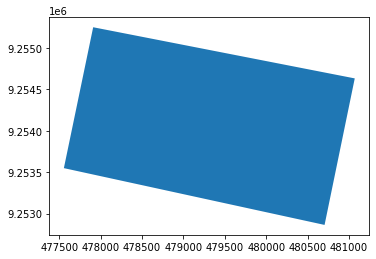

In [55]:
poly_path = 'input_data/angel_lopez_utm.geojson'

poly = gpd.read_file(poly_path)
poly.plot()
poly.sindex
poly.head(2)

In [72]:
poly.to_crs(4326)


geometry
0  POLYGON Z ((-75.19989 -6.73764 0.00000, -75.20...

#### **With list of coordinates as input**

In [81]:
coordinates = [
    (-3.361875, -71.691157),
    (-3.436430, -71.738875),
    (-3.377439, -71.680305),
    (-3.420348, -71.742982)
]

<AxesSubplot:>

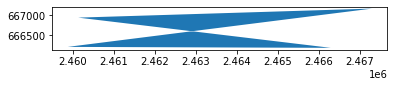

In [82]:
poly = polygon_from_coord(coordinates, convex_hull=False)
poly = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly, crs=4326)).to_crs(32718)
poly.plot()

<AxesSubplot:>

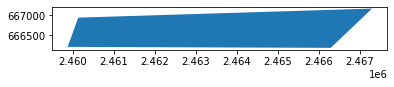

In [83]:
poly = polygon_from_coord(coordinates, convex_hull=True)
poly = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly, crs=4326)).to_crs(32718)
poly.plot()

### Applies "voronoi_splitter" function and retrieves the result in an object called "result"

The arguments of the function voronoi_splitter are:
- Input polygon as a geopandas object
- Number of sub-polygons for the output (the number of smaller polygons requested as an output)
- CRS (coordinate reference system) of the input
- Number of random points used to build the Voronoi's polygons, the bigger the number the less variance in the areas of the resulting polygons (but also a big number of point can make the function slow, and eventually break the procces)
- The seed is just for make reproductible the random point generation, does't matter in this case and is set by default to 1

In [84]:
result = voronoi_splitter(poly, 300, crs='EPSG:32718', npoints=10000, seed=1)
result.head(3)

A total of 300 polygons where created.
Areas range from 10593 to 26281 square meters


geometry  id     area  centroid_x  \
0  POLYGON ((-3.42125 -71.74132, -3.41879 -71.741...   1  19663.9   -3.421167   
1  POLYGON ((-3.36527 -71.69164, -3.36638 -71.690...   2  18672.5   -3.363924   
2  POLYGON ((-3.36565 -71.69289, -3.36673 -71.692...   3  15275.5   -3.364690   

   centroid_y  
0  -71.742052  
1  -71.691108  
2  -71.692307

<AxesSubplot:>

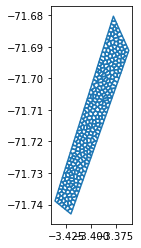

In [85]:
result.boundary.plot()

### Saves to JSON

The arguments of the function are:
- Output path for the JSON file
- Geopandas object which should be the output of the voronoi_splitter function
- The fields to include in the JSON file

In [ ]:
def json_writer2(output_path, gdf, columns):
    "Retrieves coordinates and saves as a JSON file"
    _gdf = gdf.copy()
    # add tuples coordinates as a column
    _gdf['coordinates'] = get_coordinates(gdf)
    _gdf['centroid'] = get_centroid_coordinates(gdf)
    try:
        df = pd.DataFrame(_gdf[columns])
        df.to_json(output_path, orient="records", indent=1)
        print('JSON file was writen in {}'.format(output_path))
    except Exception as e:
        print('Export to JSON failed')
        print(e)

In [ ]:
json_writer2('output_data/voronois_python.json', result, ['id', 'area', 'coordinates', 'centroid'])

### Saves to GeoJSON (can be loaded in any desktop GIS, like QGIS)

In [ ]:
result.to_file('output_data/voronois_python.geojson', driver='GeoJSON')

### Plot histogram of areas

In [ ]:
area = result['area']
fig, axs = plt.subplots(1)
axs.hist(area, bins=30)